## Pre-processing

In [2]:
import pandas as pd

In [25]:
#original dataset not included in repo as it is too large
df = pd.read_csv("DOT_Traffic_Speeds_NBE.csv")

In [26]:
df['DATA_AS_OF'] = pd.to_datetime(df['DATA_AS_OF'])

In [27]:
df['DATA_AS_OF'] = (df['DATA_AS_OF']).dt.date

In [28]:
df['DATA_AS_OF'] = pd.to_datetime(df['DATA_AS_OF'])

In [31]:
df = df.drop(['ID', 'STATUS','LINK_ID',"LINK_POINTS","ENCODED_POLY_LINE","ENCODED_POLY_LINE_LVLS","TRANSCOM_ID","OWNER","LINK_NAME"], axis=1)

In [33]:
df["Date"] = df["DATA_AS_OF"]

In [36]:
df = df.drop(["DATA_AS_OF"],axis=1)

## Saving data from 2019 onwards in a separate file

In [43]:
df1 = df[(df["Date"] > '2018-12-31')]

In [46]:
#data written to output directory
df1.to_csv("../output/Traffic_Speed_2019_onwards.csv",index=False)

# Analysis

In [8]:
df = pd.read_csv("../output/Traffic_Speed_2019_onwards.zip")

In [49]:
df['Date'] = pd.to_datetime(df['Date'])

## Aggregating vehicle speed for New York City

In [55]:
df1 = df.resample('M', on='Date').mean()

C:\Users\Kartik Kotian\AppData\Local\Temp\ipykernel_22600\3756427374.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.resample('M', on='Date').mean()


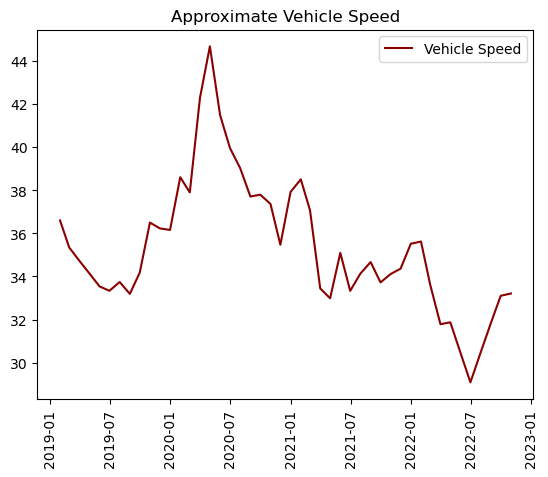

In [70]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# Plot a simple line chart
# plt.plot(df["severity_injuries"], color='g', label='Line y')
plt.title("Approximate Vehicle Speed")

# Plot another line on the same chart/graph
plt.plot(df1["SPEED"], color='darkred', label='Vehicle Speed')
plt.xticks(rotation = 90)


plt.legend()
plt.show()

## Aggregating vehicle speed at borough level

In [63]:
# Aggregating datsets:

# Manhattan
dfM = df.loc[df["BOROUGH"]=="Manhattan"]

# Queens
dfQ = df.loc[df["BOROUGH"]=="Queens"]

# Brooklyn
dfK = df.loc[df["BOROUGH"]=="Brooklyn"]

# Bronx
dfX = df.loc[df["BOROUGH"]=="Bronx"]

# Staten Island
dfS = df.loc[df["BOROUGH"]=="Staten Island"]


In [64]:
# Aggregating at month level:

dfM = dfM.resample('M', on='Date').mean()

dfQ = dfQ.resample('M', on='Date').mean()

dfK = dfK.resample('M', on='Date').mean()

dfX = dfX.resample('M', on='Date').mean()

dfS = dfS.resample('M', on='Date').mean()

C:\Users\Kartik Kotian\AppData\Local\Temp\ipykernel_22600\2768972775.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfM = dfM.resample('M', on='Date').mean()
C:\Users\Kartik Kotian\AppData\Local\Temp\ipykernel_22600\2768972775.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfQ = dfQ.resample('M', on='Date').mean()
C:\Users\Kartik Kotian\AppData\Local\Temp\ipykernel_22600\2768972775.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be 

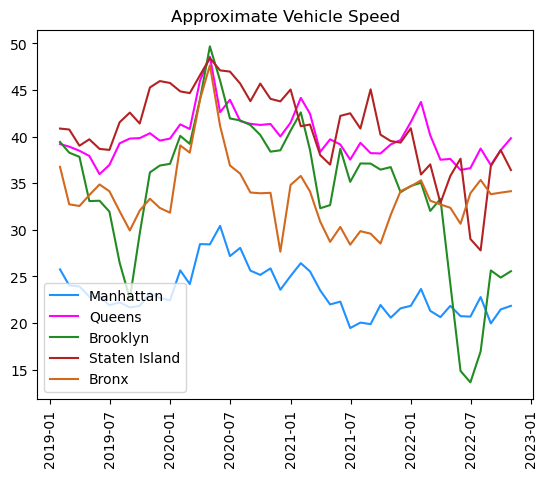

In [69]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# Plot a simple line chart
# plt.plot(df["severity_injuries"], color='g', label='Line y')


plt.title("Approximate Vehicle Speed")

plt.plot(dfM["SPEED"], color='dodgerblue', label='Manhattan')
plt.plot(dfQ["SPEED"], color='magenta', label='Queens')
plt.plot(dfK["SPEED"], color='forestgreen', label='Brooklyn')
plt.plot(dfS["SPEED"], color='firebrick', label='Staten Island')
plt.plot(dfX["SPEED"], color='chocolate', label='Bronx')
plt.xticks(rotation = 90)

plt.legend(loc="lower left")
plt.show()